<h1 style="text-align:center;">Using the Stock Price Simulator</h1>

<p> First make sure that the file StockPriceSimulator.py is in the same file as the desired markdown/notebook environment you want to work. Then call the simulateStockData class from the file as demonstrated below </p>

In [1]:
from StockPriceSimulator import simulateStockData

<p>The next and most important thing to do is initialize the simulateStockData class. There are three arguments needed, the stock yahoo ticker, the start time period in terms of numbers of days from today, and the desired intervals between each period, for example (1d) for daily data. Currently, custom time periods that do not end at the today are not supported. See the actual python file for more supported intervals. Also refrence yahoo for their stock tickers. What this initialization does is it downloads the data from yahoo finance depending on your specifications and puts it in the current folder you're coding the notebook in (Do NOT move the data). Also warning for working with the class, I have tried to include a few guardrails to prevent bad usage, but things can still go very wrong</p>

<p>This example below downloads the FTSE 350 data on the London stock exchange. It downloads 20 years (20 * 365) worth of data in terms of daily price.</p>

In [2]:
myStock = simulateStockData("^FTLC", 20 * 365, "1d")

### Graphing

<p>There are a couple different ways to graph your stock data with the class. The first one is called plotStochasticPath. All you have to do to start is add a plot title and it produces a line graph over time of the stock data. The bar chart under the graph is the period price change</p>

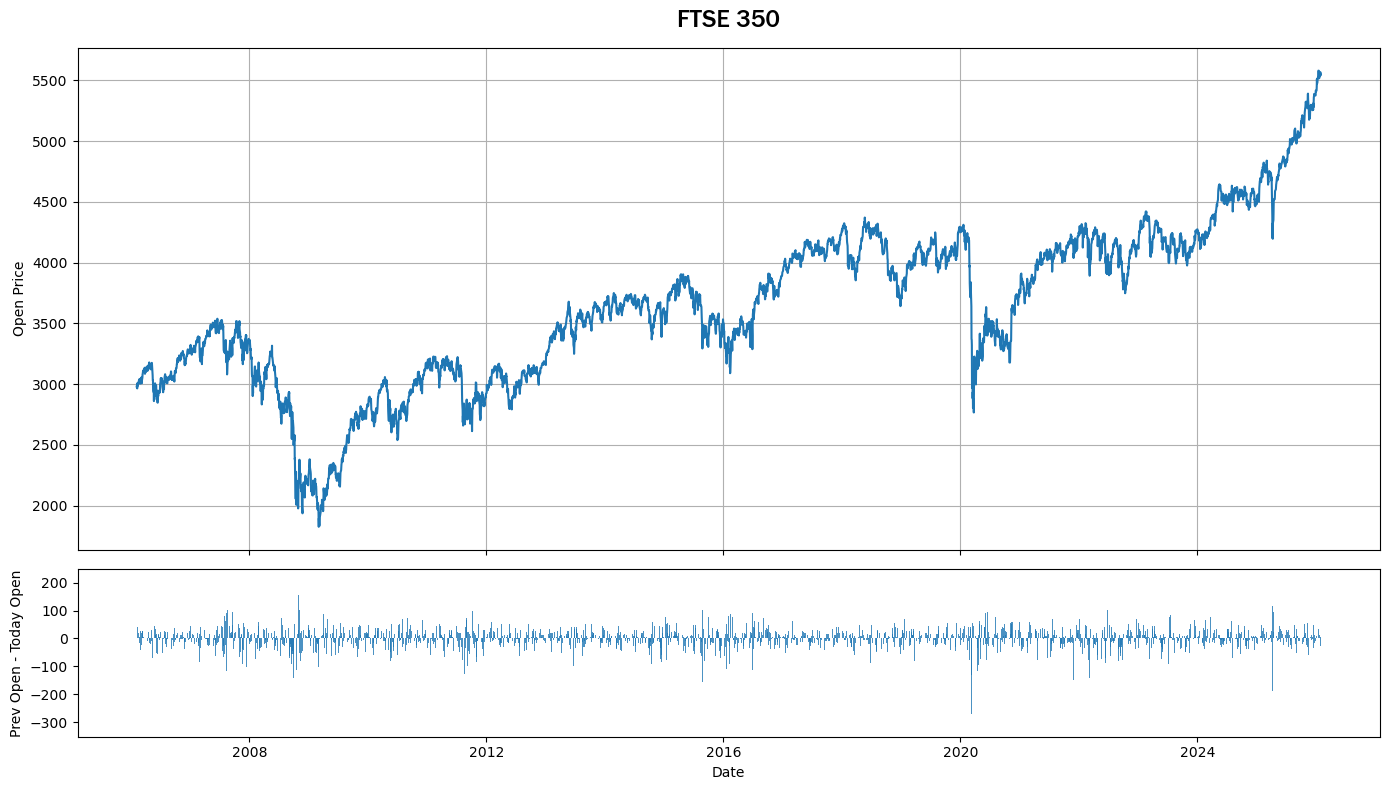

In [3]:
myStock.plotStochasticPath("FTSE 350")

There is some additional/optional functionality using the parameters below:
- show_ax2 - set this equal to false to remove bar chart below
- ax1_column - set this to any column (Open, High, Low, Close) to get a price other than Open
- ax2_column - set this to any column (Open, High, Low, Close) to get a bar chart other than daily change (not recommended)
- ax1_yLabel - Custom label for line chart
- ax2_label - Custom label for bar chart

Another graphing option is the classic stock candlestick chart. Again all you have to provide is a title to start. You get a custom candlestick chart with 7 day and 30 day moving averages

c:\Users\brans\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


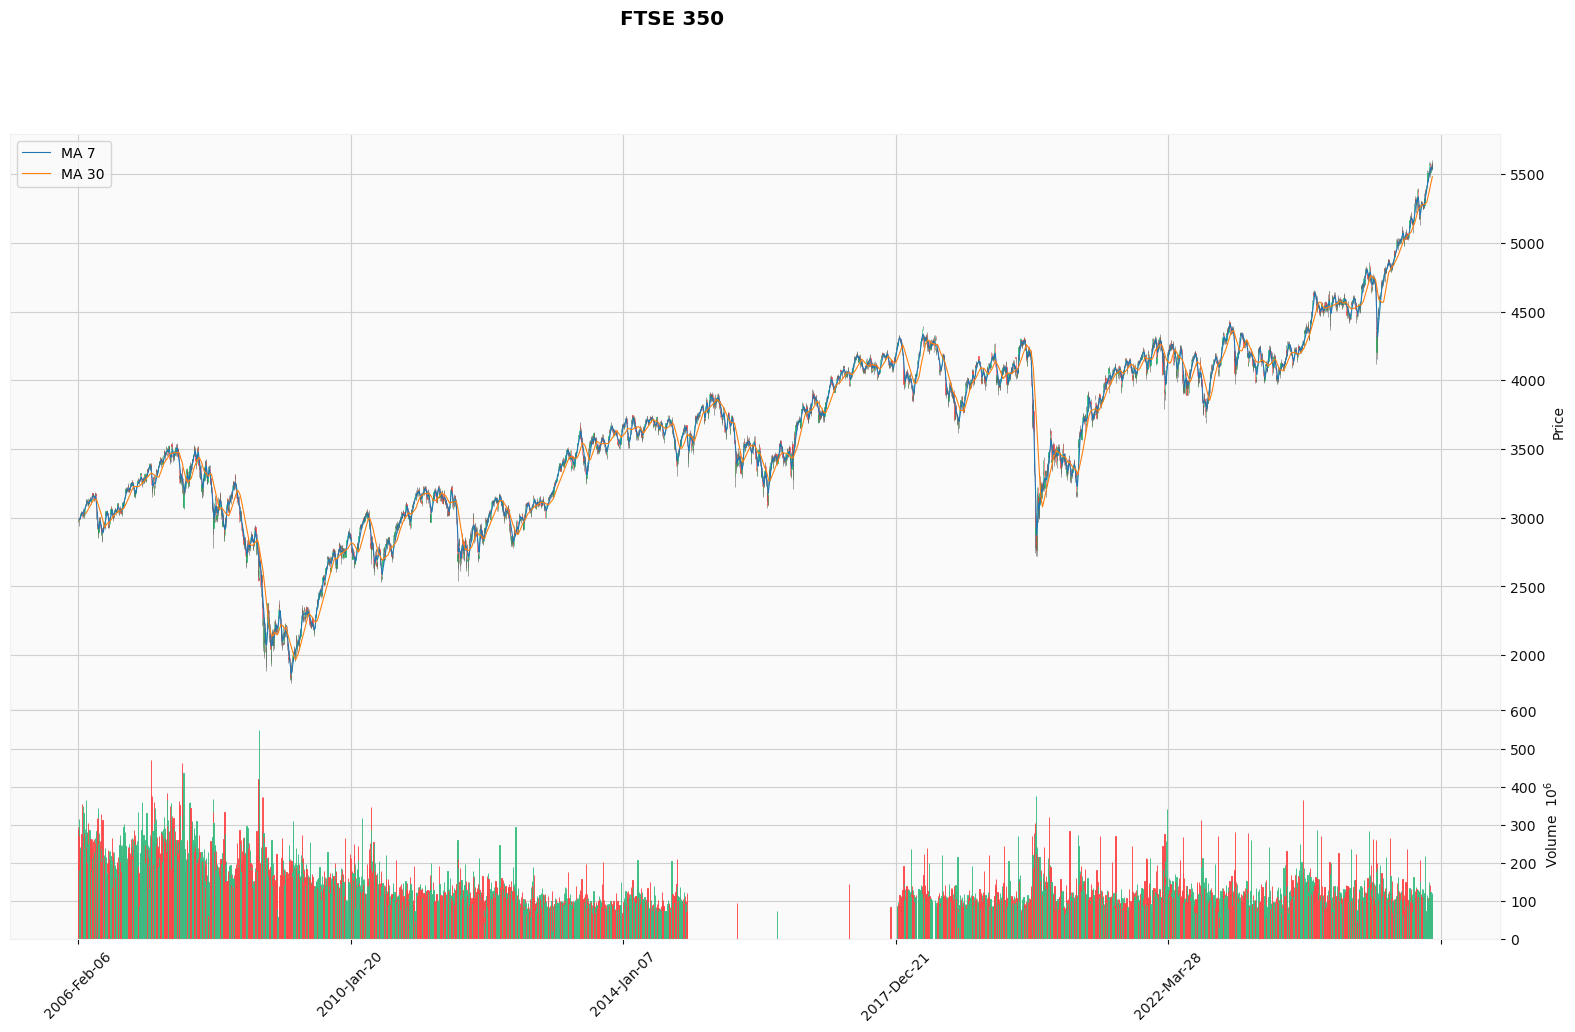

In [4]:
myStock.plotCandlestick("FTSE 350")

As you can see, it provides an error and is hard to get the details. Because of this it is recommended to resample the data into a new time period. The periods are either day (d), month (m), or year (y). The resampling period takes in a new time period and reorganizes the data into that time period by taking the mean of the smaller data of that period. For example the plot below resamples by month

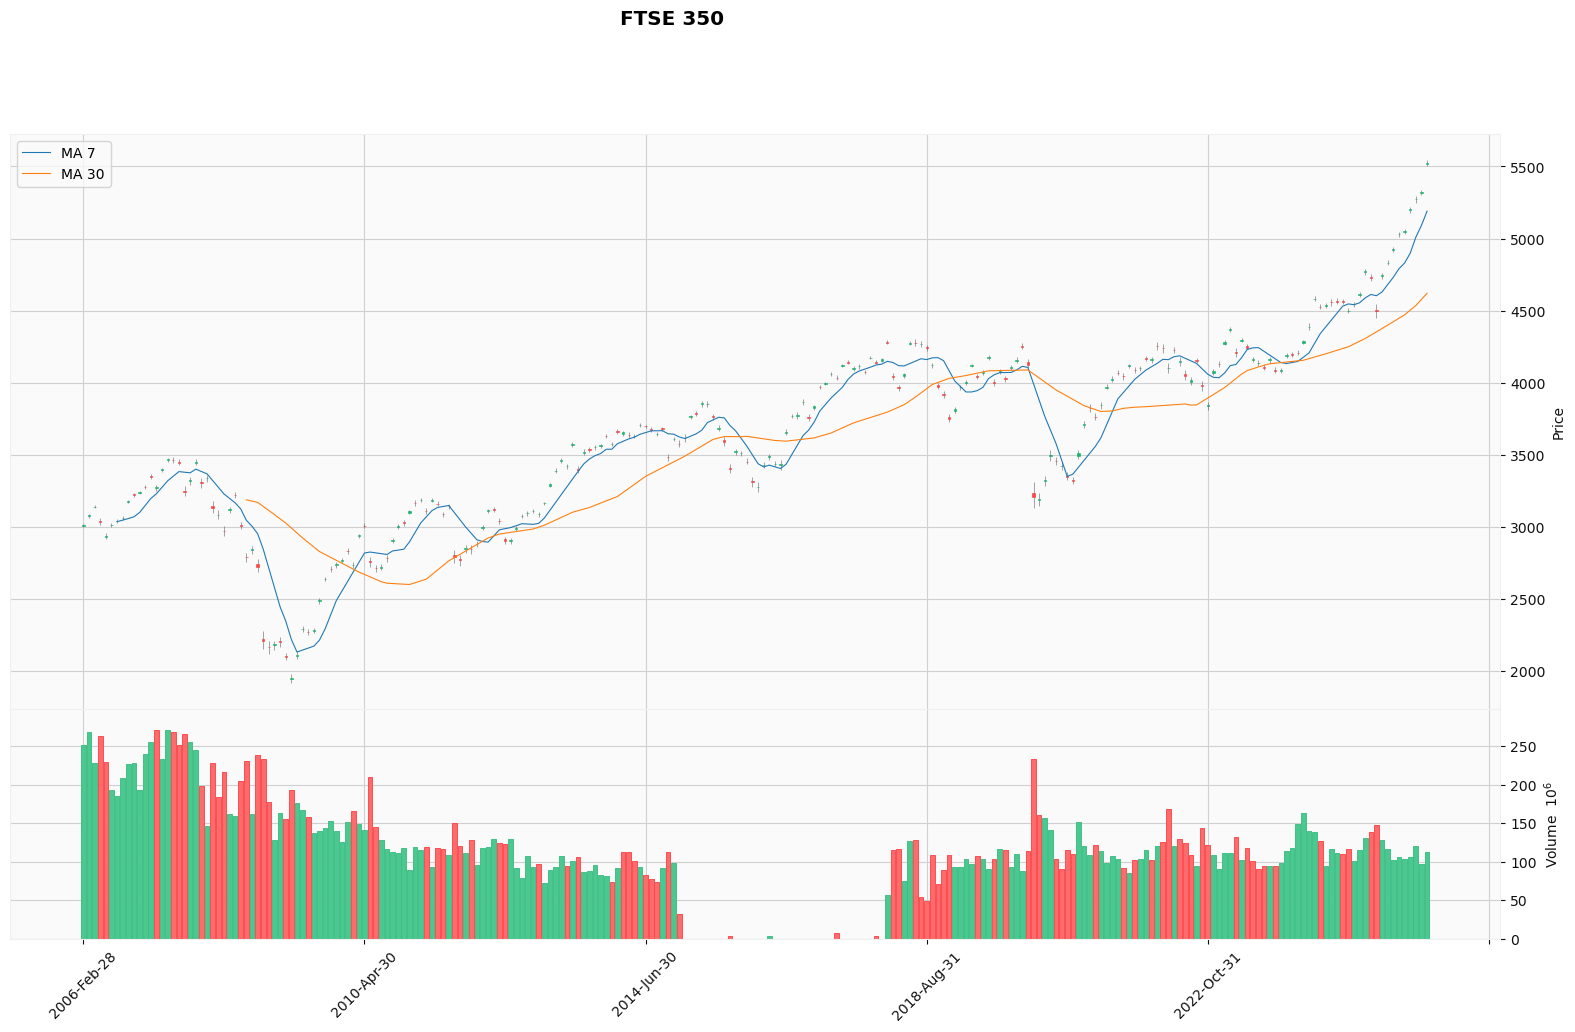

In [5]:
myStock.plotCandlestick("FTSE 350", resamplePeriod="m")

Some more custom functionality of the candlestick chart:
- plotVolume - set this equal to false to remove Volume plot under candlestick
- movingAvg - set this equal to a custom tuple of integers to get custom day moving average lines

Below is another example of the candlestick but with a better use case of a only 90 day period of the FTSE 350

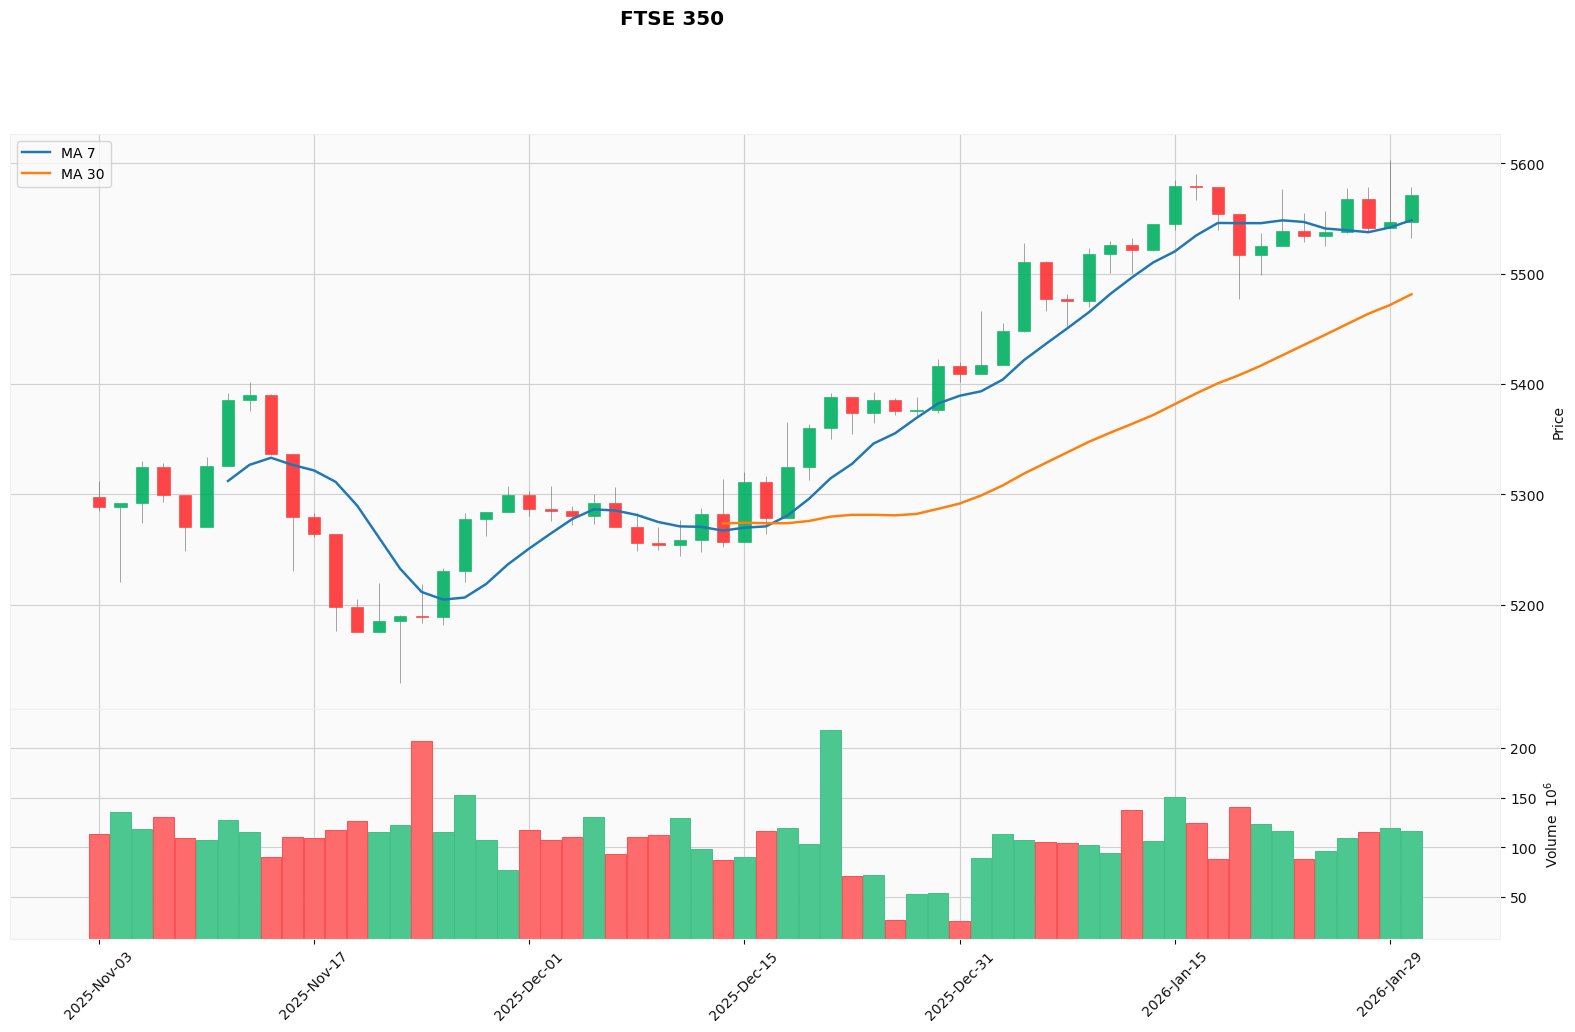

In [6]:
smallStock = simulateStockData("^FTLC", 90, "1d")
smallStock.plotCandlestick("FTSE 350")

The last type of graph availible is a histogram. This one has a lot of features which are not recommended except if truly needed. To start, all you again need is a title. It will plot a histogram of the daily open price changes by default.

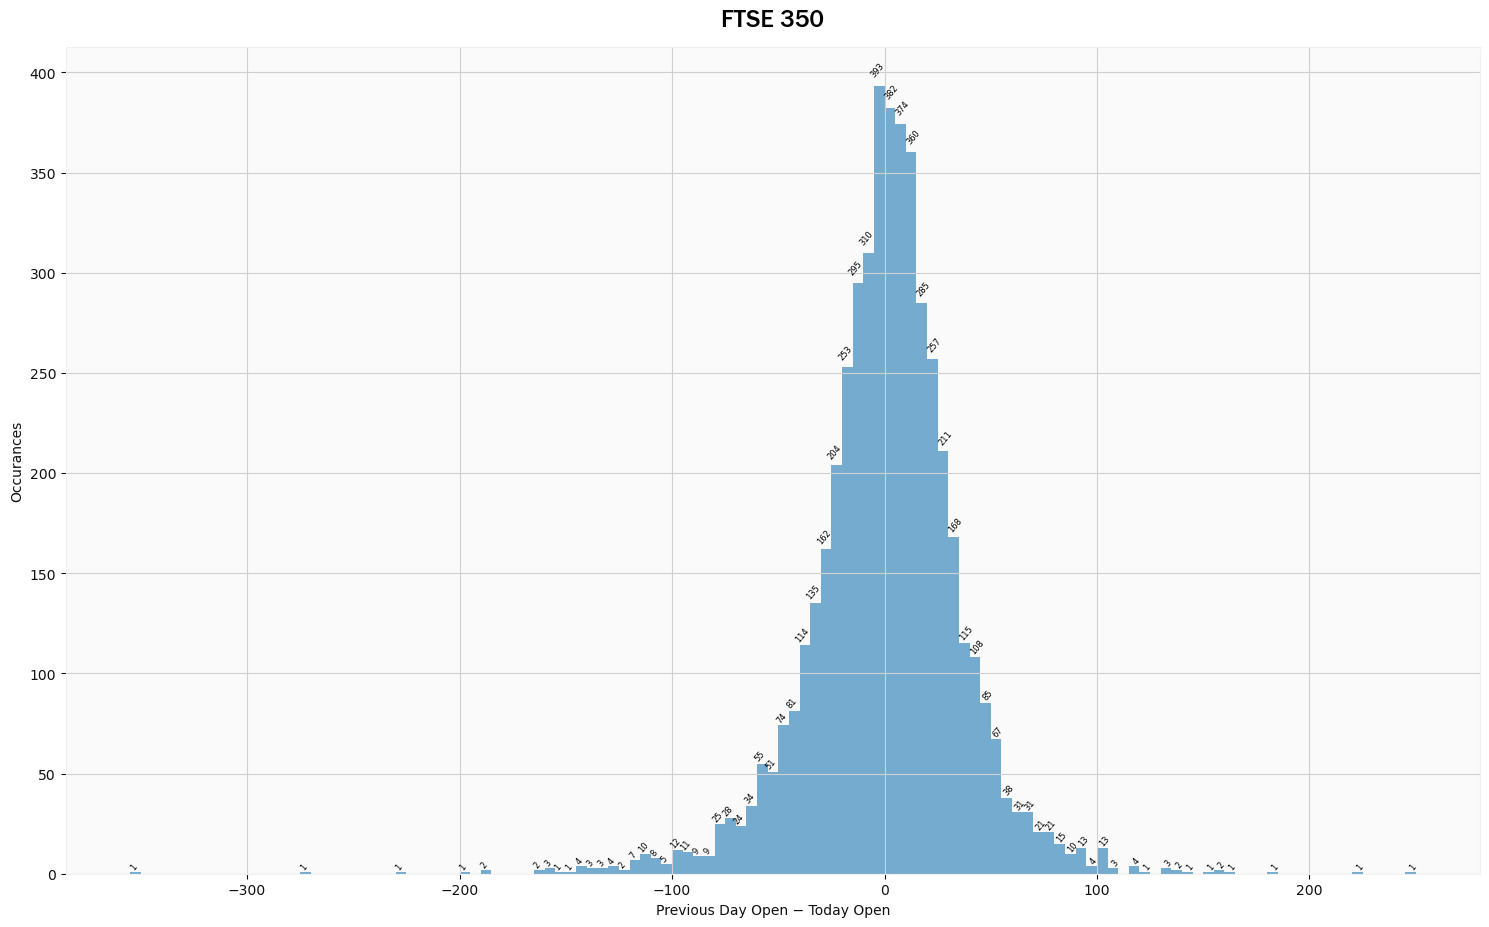

In [7]:
myStock.plotDistribution("FTSE 350")

Optional Functionality (more advanced):
- probModel - set to True to get a probability instead of occurance model
- data - define a custom dataset
- column - choose another column e.g. (Open, High, Low, Close) to plot the distribution of
- xLabel - change the label of x
- yLabel - change the label of y
- getKDE - plot the estimated CDF on the histogram (probModel must be true)
- binSize - define a custom bin size (5 by default)
- logScale - change the histogram to a logrithmic scale when true
- uniformBinPlot - change this to true when you want a uniform scale among multiple different plots. Creates bins off of Open column for all plots to use
- yLimit - define a custom ylimit
- OtherAxis - set this to a custom matplotlib axis to populate
- returnPlot - set to True if you want to store the plot into a matplotlib axis for mulitple plots



The example below is a probability model with the estimated distribution

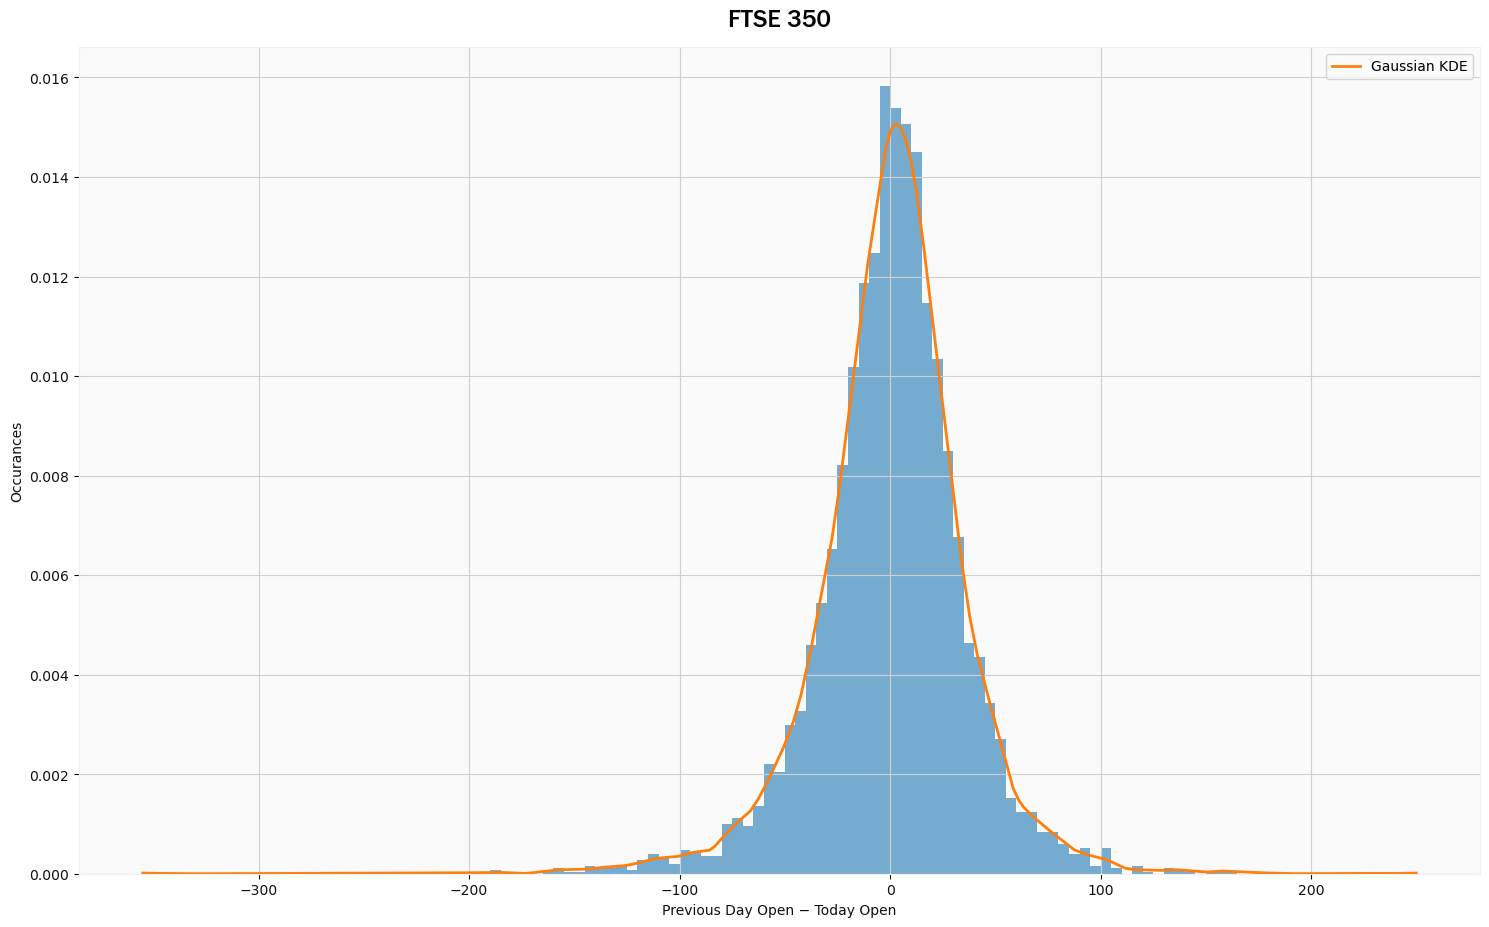

In [8]:
myStock.plotDistribution("FTSE 350", probModel = True, getKDE = True)

### Creating a custom stochastic price path with characteristics of the stock of the class

This is the most important part of the class. This allows you to simulate stochastic paths with the characteristics of the historical stock price data of the stock ticker passed in. To start with give the function simulate path a starting price and number of steps to simulate. It will return you with a stochastic path for price history as a list. For example, the function below simulates 50 steps starting at 1000.

In [9]:
myStock.simulatePath(1000, 50)

[1000,
 1009.6486090385133,
 1019.2972180770266,
 1021.416519053818,
 1267.1895252506306,
 1276.8067377616562,
 1165.0112592064725,
 1144.1729927456938,
 1148.0993406781977,
 1137.3060164660699,
 1113.0369893166542,
 1075.1561697212207,
 1135.5998470362385,
 1142.3229969059673,
 1109.8093032659554,
 1095.1541888509091,
 1041.0291941773244,
 1061.5121560200519,
 1088.9426012725085,
 1073.4881236672315,
 1074.074556708949,
 1108.0361466167392,
 1120.667233458508,
 1140.0926232921302,
 1111.599525176263,
 1163.2388613399876,
 1176.123578925626,
 1163.594856236955,
 1157.3080918699643,
 1177.5701199590542,
 1182.1601255360358,
 1185.1098630890353,
 1161.0935529149524,
 1140.7811073299908,
 1135.3955718829227,
 1075.8543535913873,
 949.7755697051056,
 936.3297804183186,
 933.1852759283154,
 929.9648465144021,
 869.1404508715656,
 845.0077511858133,
 855.8378969235634,
 874.1246222653034,
 921.9401986130674,
 883.4548945708048,
 886.8031002495195,
 990.0621358662719,
 1023.6752278839335,
 10

There are two options for sampling from distributions. You can either sample from the whole price jump distribution (whole (default)) or set method = "quartile" to sample from the conditional quartile distributions with each step.

If you want to create multiple simulations are once and put them into a dataframe, there is the option to do that. What will happen is price will start out at the starting price of your stock and progress the same number of steps as defined by the class stock period. To do this follow the function below. Make sure to set the plot to off in order for the method to return a dataframe object. All that is needed is the number of paths to simulate, the exaple below uses 5. You can also compare a column other than open price by setting compareColumn to (Open, High, Low, Close)

In [10]:
print(myStock.monteCarloSimulation(5, plotSimulation=False).head())

        Date         Open  Simulation 0  Simulation 1  Simulation 2  \
0 2006-02-06  2979.800049   2979.800049   2979.800049   2979.800049   
1 2006-02-07  2987.699951   2961.341730   3040.676147   2965.351645   
2 2006-02-08  2974.300049   2942.883410   3101.552246   2950.903241   
3 2006-02-09  2964.600098   2979.395991   3088.206728   2907.738889   
4 2006-02-10  3007.600098   3016.770951   3100.083406   2889.125236   

   Simulation 3  Simulation 4  
0   2979.800049   2979.800049  
1   2968.800002   2944.255577  
2   2957.799956   2908.711106  
3   2939.978417   2856.497179  
4   2951.746733   2901.783922  


Custom functionality for monteCarloSimulation:
- startingPrice - custom starting price
- numSteps - custom number of steps
- samplingMethod - either whole or conditionalQuartile sampling (see above for more details)

Another option is to set the plot to true to plot out the Monte Carlo Paths. In this case all the paths will be displayed in multicolor and the actual path will be shown above in a ticker black. The histogram of the terminal values of the paths will be shown on the side with the estimated distribution. On this distribution the expected value of the simulated paths will be shown compared to the end value of the actual path

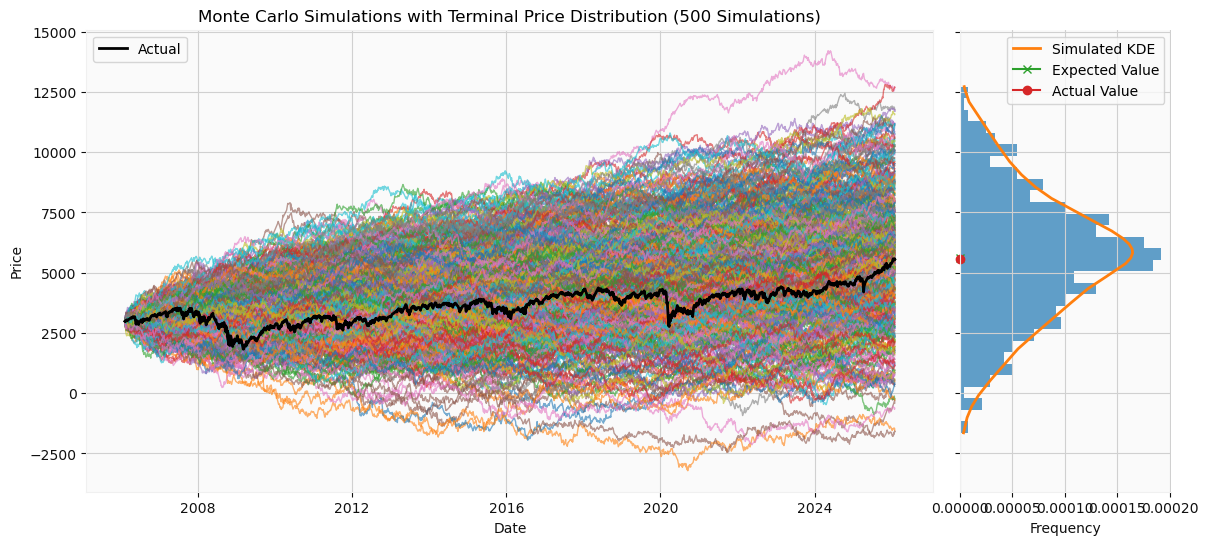

In [11]:
myStock.monteCarloSimulation(500, plotSimulation=True)

By setting plotType equal to historical (hist), the histogram on the left will change. Instead of being the terminal prices of the simulated path, the histogram will be instead all observed prices at every time step for all the paths. Instead of showing the expected value as well, the distribution of all the prices observed at every time point for the actual path will be displayed.

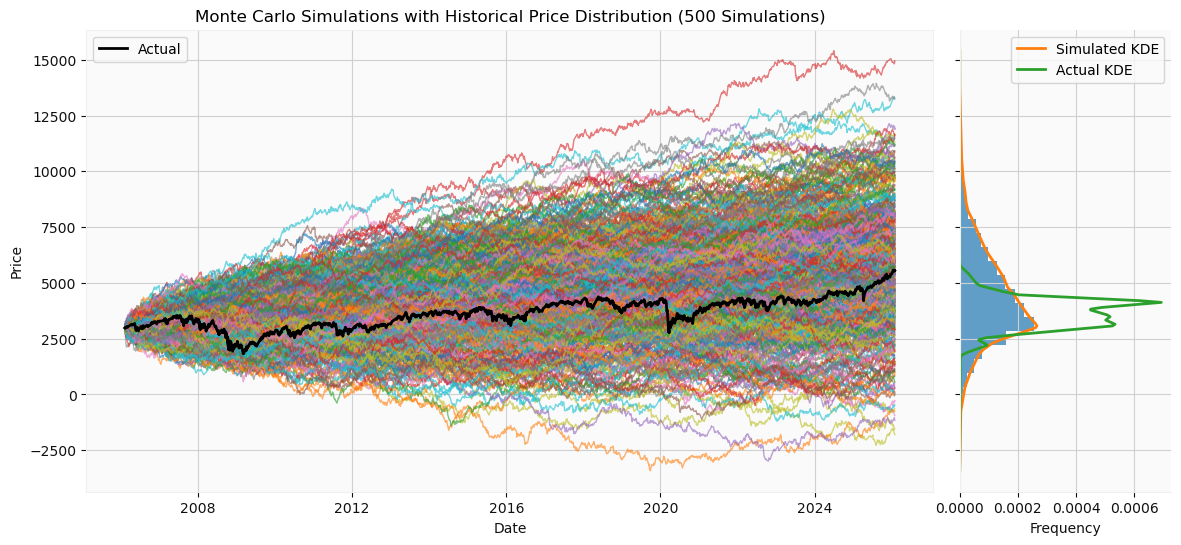

In [12]:
myStock.monteCarloSimulation(500, plotSimulation=True, plotType = "hist")

### Aditional features
One additional feature to note is that it is possible to plot the distribution of jumps after a jump in every single quartile. This is the method used for quartile sampling

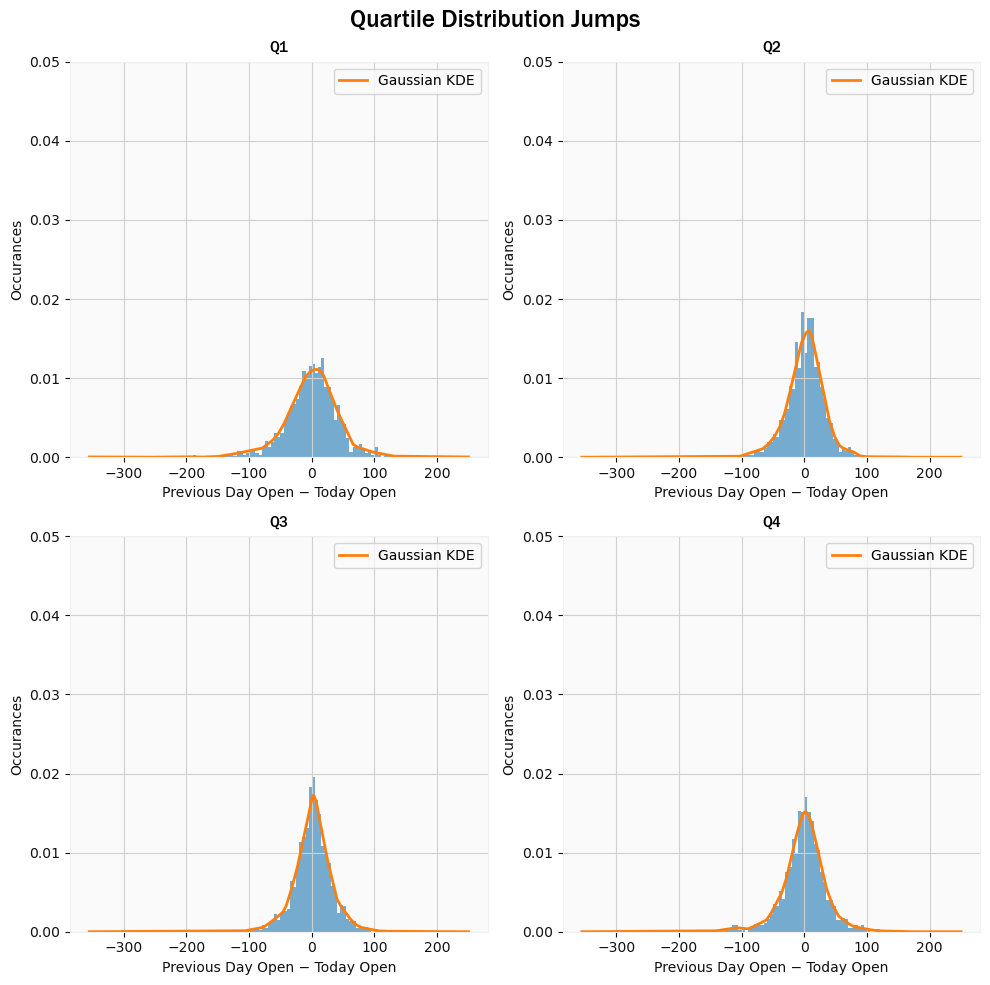

In [13]:
myStock.plotQuartileDistributions()